## 선형 보간 : 인접한 데이터 포인트 사이를 직선으로 연결하여 결측치를 채우는 방식
1. 결측치 앞과 뒤에 있는 유효한 데이터 포인트를 찾는다.
2. 해당 유효한 데이터 포인트의 값과 위치를 사용하여 결측치의 위치를 연결하는 직선의 방정식을 세운다.
3. 직선의 방정식을 사용하여 결측치의 값을 추정하고 대체한다.

선형적인 대체 방식이다. 간단하고 계산이 비교적 빠르다. 그러나 선형적인 특성을 가정하고 있기 때문에 실제 데이터의 특성과 부합하지 않을 수도 있다.

In [2]:
# 선형보간 - pandas를 활용한 선형 보간 실습
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 시계열 데이터 생성
dates = pd.date_range(start='2023-01-01', periods=10, freq = 'D')
values = [1, np.nan, 3, np.nan, 5, 6, np.nan, 8, 9, np.nan]

# 데이터 프레임 생성
data= pd.DataFrame({'Date' : dates, 'Value' : values})
print(data)

        Date  Value
0 2023-01-01    1.0
1 2023-01-02    NaN
2 2023-01-03    3.0
3 2023-01-04    NaN
4 2023-01-05    5.0
5 2023-01-06    6.0
6 2023-01-07    NaN
7 2023-01-08    8.0
8 2023-01-09    9.0
9 2023-01-10    NaN


        Date  Value  Value_linear
0 2023-01-01    1.0           1.0
1 2023-01-02    NaN           2.0
2 2023-01-03    3.0           3.0
3 2023-01-04    NaN           4.0
4 2023-01-05    5.0           5.0
5 2023-01-06    6.0           6.0
6 2023-01-07    NaN           7.0
7 2023-01-08    8.0           8.0
8 2023-01-09    9.0           9.0
9 2023-01-10    NaN           9.0


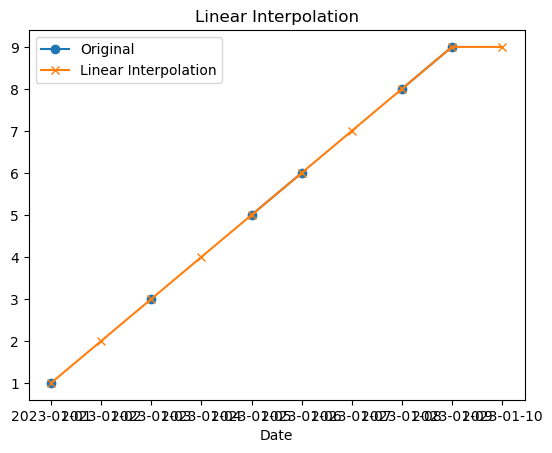

In [5]:
# 선형 보간 적용
data['Value_linear'] = data['Value'].interpolate(method = 'linear')
print(data)

# 시계열 데이터 시각화
plt.plot(data['Date'], data['Value'], 'o-', label='Original')
plt.plot(data['Date'], data['Value_linear'], 'x-', label = 'Linear Interpolation')
plt.xlabel('Date')
plt.title('Linear Interpolation')
plt.legend()
plt.show()

'Original'은 원본 데이터를 나타내며, 'Linear Interpolation'은 선형 보간된 데이터를 나타냄
x축은 날짜(Date)를 나타내고, y축은 값(Value)을 나타냄
원본 데이터의 경우, 결측치가 있어서 일부 값이 비어있는 것을 볼 수 있습니다. 선형 보간된 데이터는 결측치를 선형적으로 보간하여 채운 결과이다.
선형 보간된 데이터는 원본 데이터의 경향을 따라가면서 결측치를 채웠기 때문에 부드러운 곡선으로 이어져 있다.


#### 주로 사용되는 세 가지 보간법 소개
* 선형 보간 : 주어진 두 점을 직선으로 연결하여 결측치를 채운다. 선형 보간은 간단하고 빠르게 적용할 수 있으며, 데이터의 경향을 따라 결측치를 추정한다.
* 스플라인 보간 : 주어진 데이터를 부드러운 곡선으로 근사화하여 결측치를 채운다. 스플라인 보간은 다항식 또는 조각적 다항식 함수를 사용하여 결측치를 추정한다. 주로 크기가 큰 데이터셋이나 곡선의 특징을 잘 파악해야 하는 경우에 사용
* 최근접 이웃 보간 : 결측치를 가장 가까운 이웃의 값으로 채운다. 가장 간단한 방법 중 하나로, 데이터가 이산적이거나 이상치에 민감하지 않을 때 사용될 수 있다.